# Tensors and Operations

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

print(torch.__version__)

2.0.0


In [2]:
# 0 dimensional tensor (scalar)
s = torch.tensor(7)
s.ndim, s.shape

(0, torch.Size([]))

In [3]:
# 1 dimensional tensor (vector)
t1 = torch.Tensor([1,2,3,4,5])
t1.ndim, t1.shape

(1, torch.Size([5]))

In [4]:
# 2 dimensional tensor (matrix)
t2 = torch.Tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])

t2.ndim, t2.shape

(2, torch.Size([3, 3]))

In [5]:
# random, zeros and ones
r = torch.rand(size = (3, 3))
print(r)

z = torch.zeros(size = (3, 1))
print(z)

o = torch.ones(size = (1, 3))
print(o)

tensor([[0.2341, 0.5442, 0.8334],
        [0.7943, 0.4374, 0.1378],
        [0.2007, 0.4393, 0.9788]])
tensor([[0.],
        [0.],
        [0.]])
tensor([[1., 1., 1.]])


In [6]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.7651, 0.8294, 0.9434, 0.0870],
        [0.1210, 0.2442, 0.1636, 0.5569],
        [0.2561, 0.0975, 0.9815, 0.1531]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
mat1 = torch.rand(2,3)
mat2 = torch.rand(3,1)

mat1@mat2 #dot product (same as torch.matmul(mat1, mat2))

tensor([[0.7743],
        [0.5129]])

## Linear

In [8]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B.T) # (this will error)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [9]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2,  # in_features = matches inner dimension of input 
                         out_features=6,
                         bias=True) # out_features = describes outer value 
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [10]:
linear.weight, linear.bias

(Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5224,  0.0958,  0.3410, -0.0998,  0.5451,  0.1045],
        requires_grad=True))

## Min, Max, ArgMin, ArgMax.

Basically the same as numpy

In [11]:
# Create a tensor
x = torch.arange(0, 100, 10).reshape(2,5)
x

tensor([[ 0, 10, 20, 30, 40],
        [50, 60, 70, 80, 90]])

In [12]:
# require casting to float for mean
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

In [13]:
a = x.reshape(1, -1).squeeze()
a

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

## Simple NN

In [125]:
X = torch.arange(1, 100, 0.5).reshape(-1,1)
weight = torch.tensor(1.5)
bias = torch.tensor(7)
noise = torch.rand(X.shape) * 10
y = X * weight + bias + noise

<Axes: >

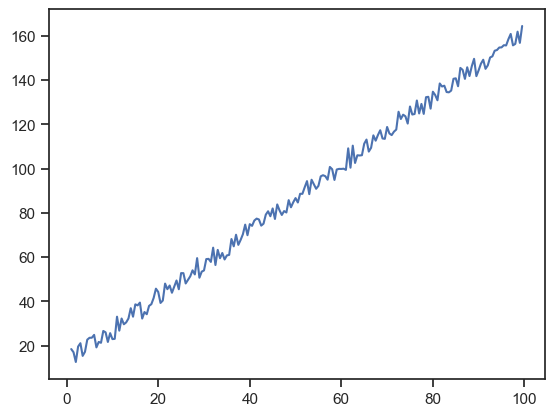

In [131]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.lineplot(x = X.squeeze(), y = y.squeeze())

In [117]:
X = torch.arange(1, 100, 0.5).reshape(-1)
w = torch.tensor([1.5])
b = torch.tensor(7)
n = torch.rand(X.shape) * 10
y = X * weight + bias + noise

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.w = nn.Parameter(torch.tensor(0.,), requires_grad = True)
        self.b = nn.Parameter(torch.tensor(0.), requires_grad = True)

    def forward(self, x):
        output = x * self.w + self.b
        return output

model = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Train the model
for epoch in range(1):
    
    running_loss = 0.0
    
    for i in range(98):
        running_loss = 0.0
        inputs, labels = X.unsqueeze(1)[i], y.unsqueeze(1)[i]
        #print(inputs, labels)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        l = loss.item()
        running_loss += l
        print(f"loss: {l}")

print('Finished Training')

loss: 98.38945007324219
loss: 104.6805419921875
loss: 329.1604919433594
loss: 254.49270629882812
loss: 456.5322570800781
loss: 329.11480712890625
loss: 172.618408203125
loss: 388.5721740722656
loss: 560.7239990234375
loss: 519.0894775390625
loss: 472.15118408203125
loss: 288.5527648925781
loss: 333.5289001464844
loss: 631.2720336914062
loss: 350.88690185546875
loss: 556.5034790039062
loss: 486.7010498046875
loss: 604.841064453125
loss: 545.2728271484375
loss: 371.5318603515625
loss: 448.28106689453125
loss: 756.1282958984375
loss: 549.8430786132812
loss: 632.1910400390625
loss: 387.75238037109375
loss: 669.4434814453125
loss: 409.368408203125
loss: 365.8955078125
loss: 453.6811218261719
loss: 316.1009521484375
loss: 286.4274597167969
loss: 307.7015380859375
loss: 295.05816650390625
loss: 189.280029296875
loss: 308.9330139160156
loss: 99.17312622070312
loss: 297.6056823730469
loss: 309.7104797363281
loss: 154.31382751464844
loss: 88.69878387451172
loss: 26.658479690551758
loss: 133.9412

In [118]:
# Access the weights of the first linear layer
weights = model.state_dict()
print(weights)

OrderedDict([('w', tensor(1.7474)), ('b', tensor(0.1609))])


<Axes: >

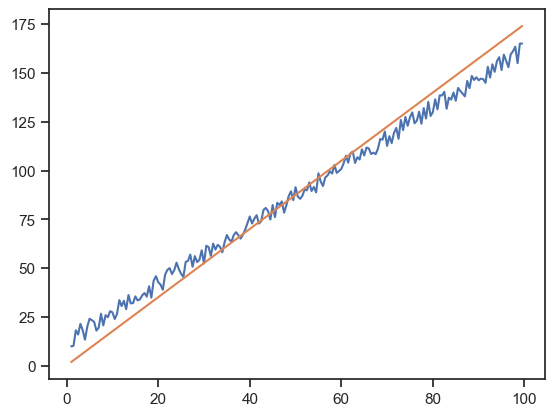

In [121]:
y_pred = model(X)


import seaborn as sns
sns.set_theme(style="ticks")

sns.lineplot(x = X, y = y)
sns.lineplot(x = X, y = y_pred.squeeze().detach().numpy())

In [74]:
y_pred.squeeze()

tensor([ -0.4350,  -0.7285,  -1.0221,  -1.3156,  -1.6091,  -1.9026,  -2.1961,
         -2.4896,  -2.7831,  -3.0766,  -3.3701,  -3.6636,  -3.9571,  -4.2506,
         -4.5441,  -4.8376,  -5.1311,  -5.4246,  -5.7181,  -6.0116,  -6.3051,
         -6.5986,  -6.8921,  -7.1856,  -7.4791,  -7.7726,  -8.0661,  -8.3596,
         -8.6531,  -8.9466,  -9.2401,  -9.5336,  -9.8271, -10.1207, -10.4142,
        -10.7077, -11.0012, -11.2947, -11.5882, -11.8817, -12.1752, -12.4687,
        -12.7622, -13.0557, -13.3492, -13.6427, -13.9362, -14.2297, -14.5232,
        -14.8167, -15.1102, -15.4037, -15.6972, -15.9907, -16.2842, -16.5777,
        -16.8712, -17.1647, -17.4582, -17.7517, -18.0452, -18.3387, -18.6322,
        -18.9257, -19.2192, -19.5128, -19.8063, -20.0998, -20.3933, -20.6868,
        -20.9803, -21.2738, -21.5673, -21.8608, -22.1543, -22.4478, -22.7413,
        -23.0348, -23.3283, -23.6218, -23.9153, -24.2088, -24.5023, -24.7958,
        -25.0893, -25.3828, -25.6763, -25.9698, -26.2633, -26.55

In [129]:
X.squeeze()

tensor([ 1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,  4.0000,  4.5000,
         5.0000,  5.5000,  6.0000,  6.5000,  7.0000,  7.5000,  8.0000,  8.5000,
         9.0000,  9.5000, 10.0000, 10.5000, 11.0000, 11.5000, 12.0000, 12.5000,
        13.0000, 13.5000, 14.0000, 14.5000, 15.0000, 15.5000, 16.0000, 16.5000,
        17.0000, 17.5000, 18.0000, 18.5000, 19.0000, 19.5000, 20.0000, 20.5000,
        21.0000, 21.5000, 22.0000, 22.5000, 23.0000, 23.5000, 24.0000, 24.5000,
        25.0000, 25.5000, 26.0000, 26.5000, 27.0000, 27.5000, 28.0000, 28.5000,
        29.0000, 29.5000, 30.0000, 30.5000, 31.0000, 31.5000, 32.0000, 32.5000,
        33.0000, 33.5000, 34.0000, 34.5000, 35.0000, 35.5000, 36.0000, 36.5000,
        37.0000, 37.5000, 38.0000, 38.5000, 39.0000, 39.5000, 40.0000, 40.5000,
        41.0000, 41.5000, 42.0000, 42.5000, 43.0000, 43.5000, 44.0000, 44.5000,
        45.0000, 45.5000, 46.0000, 46.5000, 47.0000, 47.5000, 48.0000, 48.5000,
        49.0000, 49.5000, 50.0000, 50.50